# Data Acquisition with Pokemon dataset

In [1]:
import numpy as np
import pandas as pd

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [19]:
csv_data = pd.read_csv('Pokemon.csv')
csv_data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [20]:
print("Data type: ", type(csv_data))
print("Data dims: ", csv_data.shape)

Data type:  <class 'pandas.core.frame.DataFrame'>
Data dims:  (800, 13)


In [22]:
csv_data.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [24]:
csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [26]:
csv_data.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [39]:
mega = []
for name in csv_data['Name']:
    print(name, end=', ')

Bulbasaur, Ivysaur, Venusaur, VenusaurMega Venusaur, Charmander, Charmeleon, Charizard, CharizardMega Charizard X, CharizardMega Charizard Y, Squirtle, Wartortle, Blastoise, BlastoiseMega Blastoise, Caterpie, Metapod, Butterfree, Weedle, Kakuna, Beedrill, BeedrillMega Beedrill, Pidgey, Pidgeotto, Pidgeot, PidgeotMega Pidgeot, Rattata, Raticate, Spearow, Fearow, Ekans, Arbok, Pikachu, Raichu, Sandshrew, Sandslash, Nidoran♀, Nidorina, Nidoqueen, Nidoran♂, Nidorino, Nidoking, Clefairy, Clefable, Vulpix, Ninetales, Jigglypuff, Wigglytuff, Zubat, Golbat, Oddish, Gloom, Vileplume, Paras, Parasect, Venonat, Venomoth, Diglett, Dugtrio, Meowth, Persian, Psyduck, Golduck, Mankey, Primeape, Growlithe, Arcanine, Poliwag, Poliwhirl, Poliwrath, Abra, Kadabra, Alakazam, AlakazamMega Alakazam, Machop, Machoke, Machamp, Bellsprout, Weepinbell, Victreebel, Tentacool, Tentacruel, Geodude, Graveler, Golem, Ponyta, Rapidash, Slowpoke, Slowbro, SlowbroMega Slowbro, Magnemite, Magneton, Farfetch'd, Doduo, Do

In [45]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

Number of Generations:  6
1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64


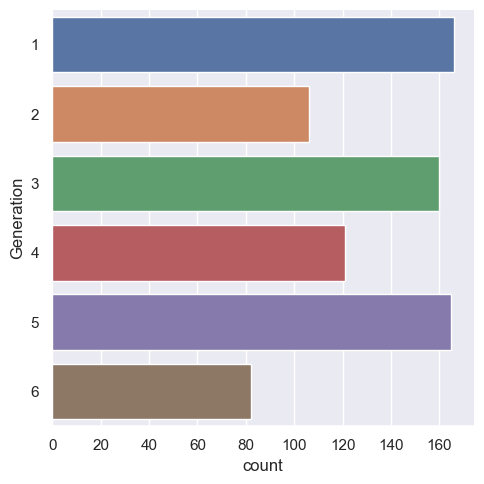

In [47]:
#generations in the dataset
print('Number of Generations: ', len(csv_data['Generation'].unique()))

#pokemons in each generation
print(csv_data['Generation'].value_counts())
sb.catplot(y = 'Generation', data=csv_data, kind="count")

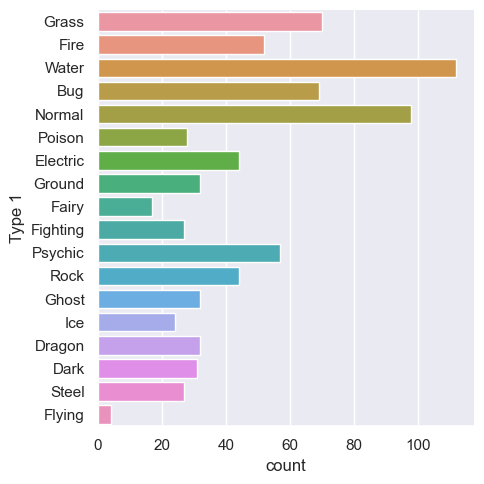

In [64]:
# print(csv_data['Type 1'].value_counts())
sb.catplot(y='Type 1', data=csv_data, kind="count")

3    18
5    15
4    13
6     8
1     6
2     5
Name: Generation, dtype: int64


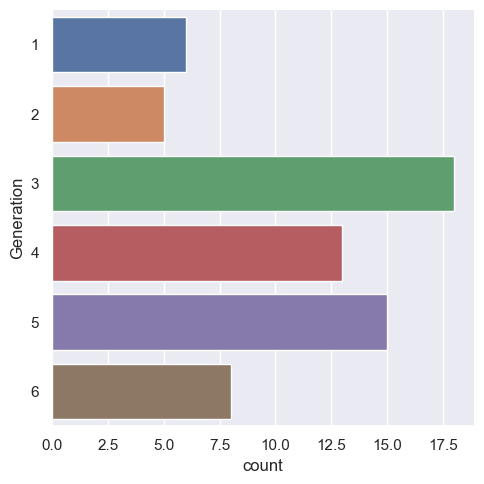

In [72]:
legend_data = csv_data[csv_data['Legendary'] == True]
print(legend_data['Generation'].value_counts())
sb.catplot(data=legend_data, y='Generation', kind='count')

Psychic     14
Dragon      12
Fire         5
Electric     4
Water        4
Rock         4
Steel        4
Ground       4
Grass        3
Ice          2
Normal       2
Ghost        2
Dark         2
Flying       2
Fairy        1
Name: Type 1, dtype: int64


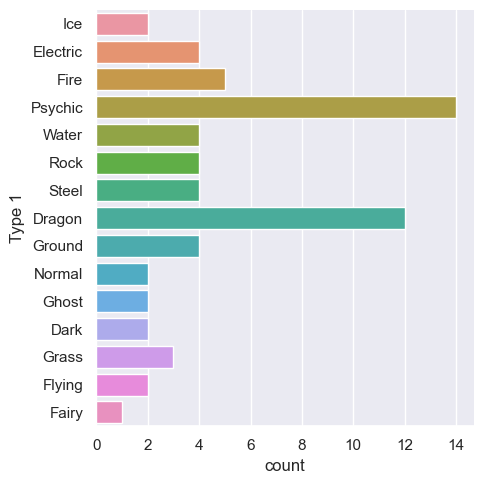

In [77]:
print(legend_data['Type 1'].value_counts())
sb.catplot(data=legend_data, y='Type 1', kind='count')

In [81]:
dualtype_legend_data = legend_data[legend_data['Type 2'].isnull() == False]
print(len(dualtype_legend_data))

40


<Axes: xlabel='Type 2', ylabel='Type 1'>

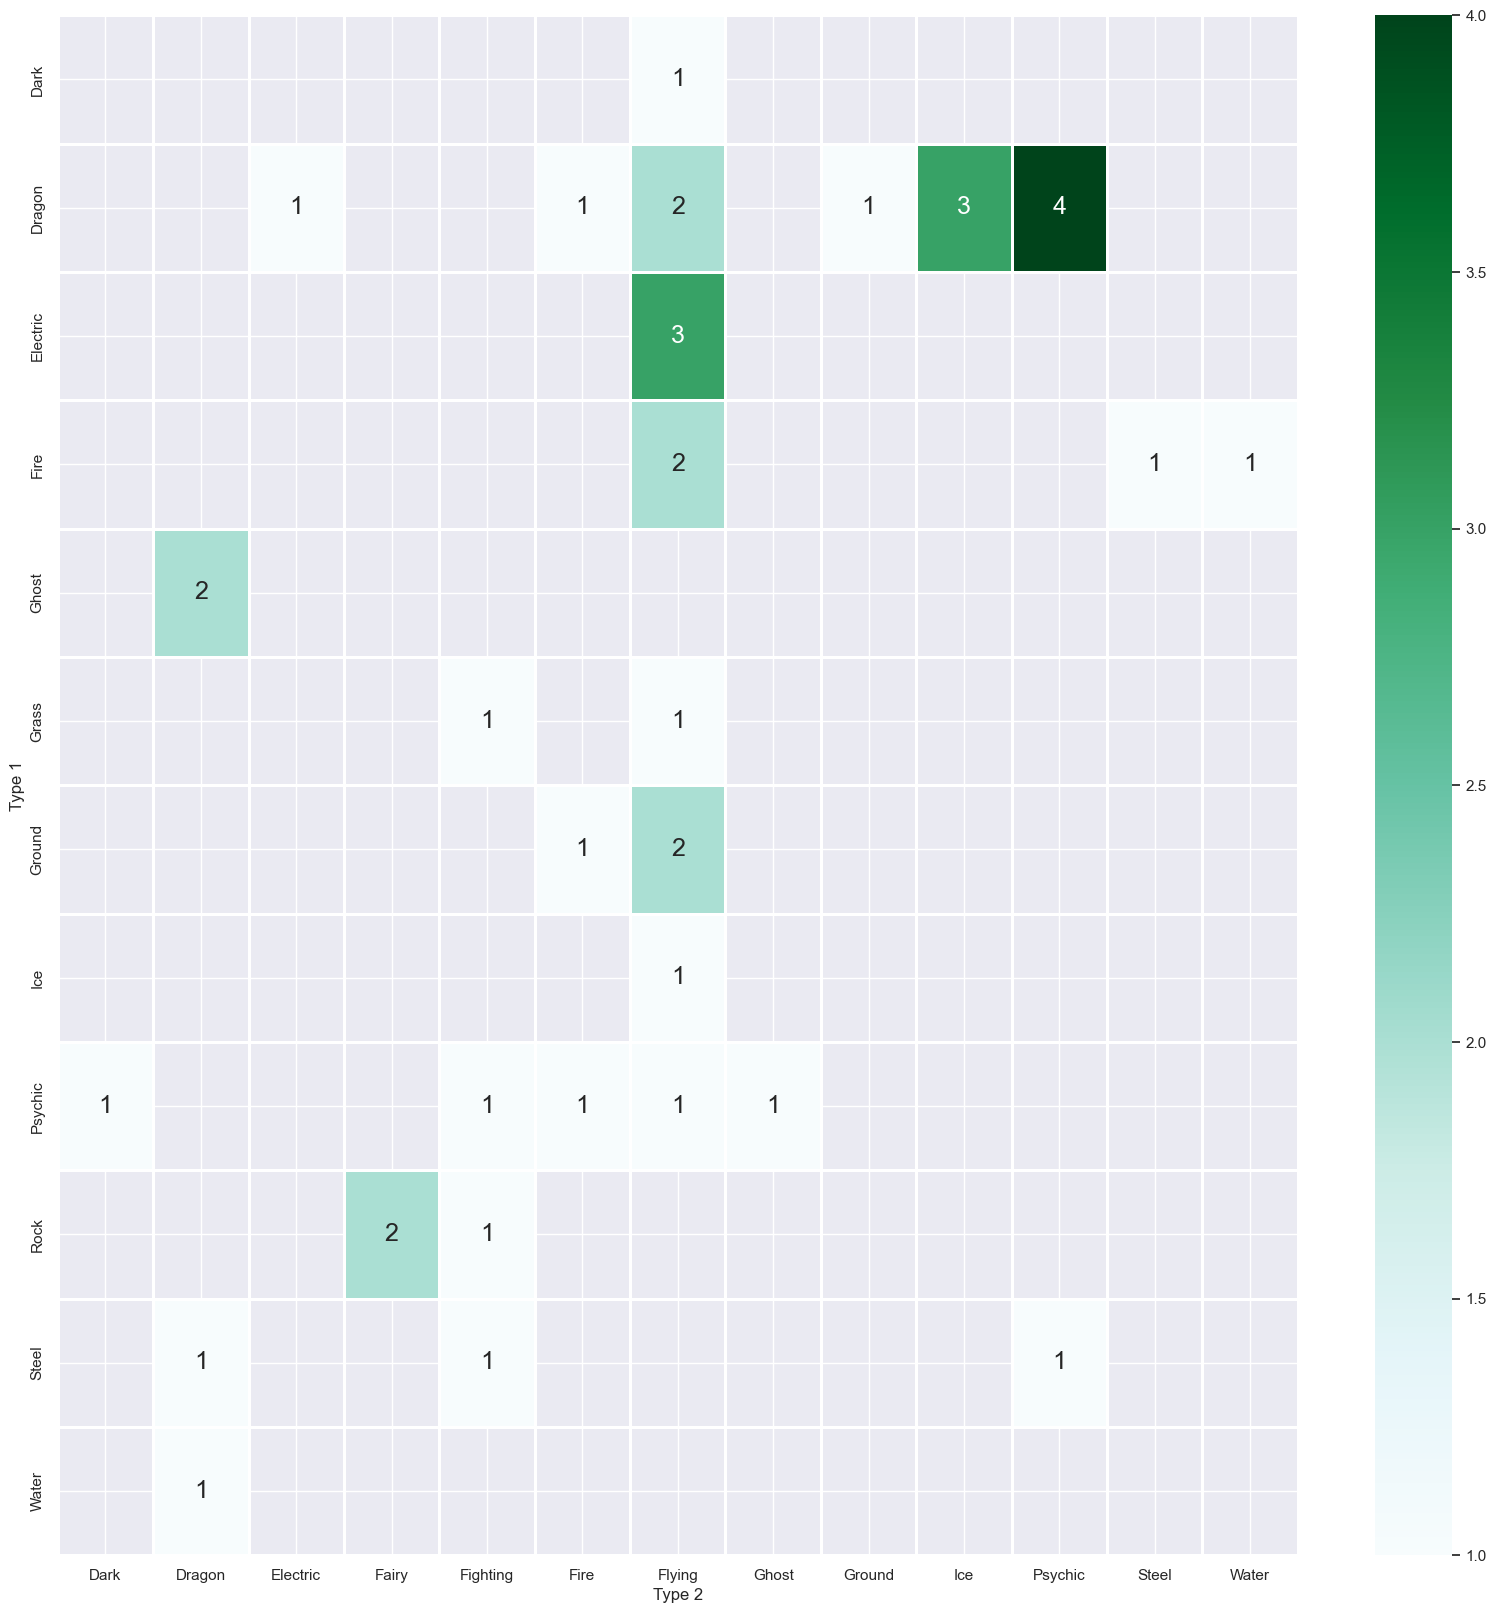

In [94]:
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(dualtype_legend_data.groupby(['Type 1', 'Type 2']).size().unstack(), linewidths=1, annot=True, annot_kws={'size':18}, cmap='BuGn')